# Data Science - Introdução a testes estatísticos

## Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

## Explorando base de dados 

In [3]:
tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [6]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [27]:
sns.set_theme(context='notebook', style= 'darkgrid', palette = 'magma')

Text(0.5, 1.0, 'Média de votos no TMDB')

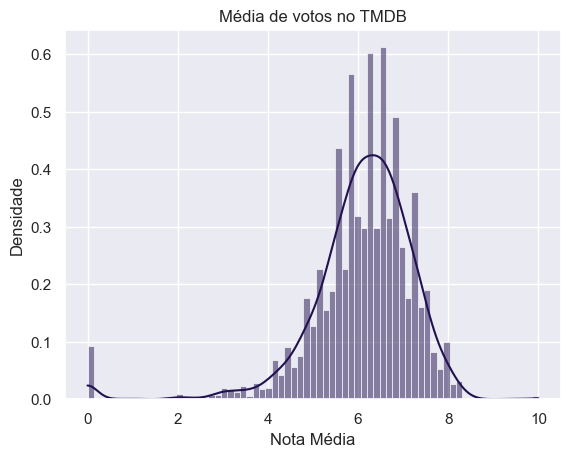

In [57]:
ax = sns.histplot(tmdb['vote_average'], kde=True, stat='density')
ax.set(xlabel= 'Nota Média', ylabel= 'Densidade')
ax.set_title("Média de votos no TMDB")

Text(0, 375, 'Mediana representada pela linha tracejada')

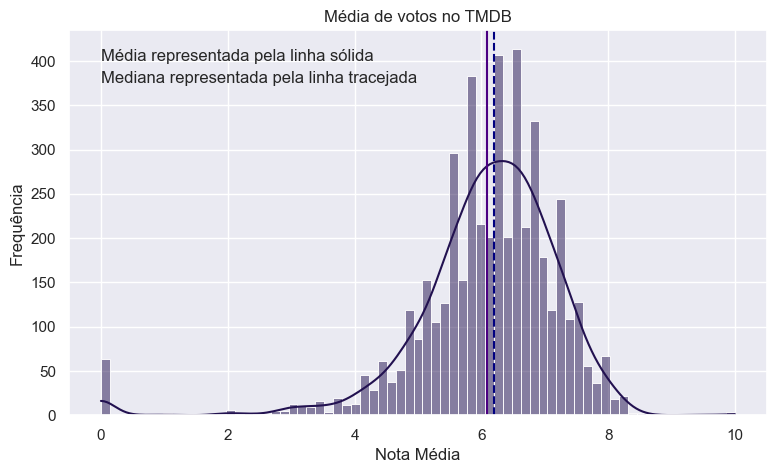

In [107]:
fig = plt.figure(figsize=(9,5))
ax = sns.histplot(tmdb['vote_average'], kde=True, stat='count')

mu = tmdb['vote_average'].mean()
median = tmdb['vote_average'].median()

ax.set(xlabel= 'Nota Média', ylabel= 'Frequência')
ax.set_title("Média de votos no TMDB")
ax.axvline(mu, color='#4B0082')
ax.axvline(median, color='#000080', linestyle='--')
ax.annotate('Média representada pela linha sólida', xy = (0,400), fontsize=12)
ax.annotate('Mediana representada pela linha tracejada', xy = (0,375), fontsize=12)

[Text(0.5, 1.0, 'Distribuição da Média das notas'), Text(0.5, 0, 'Nota Média')]

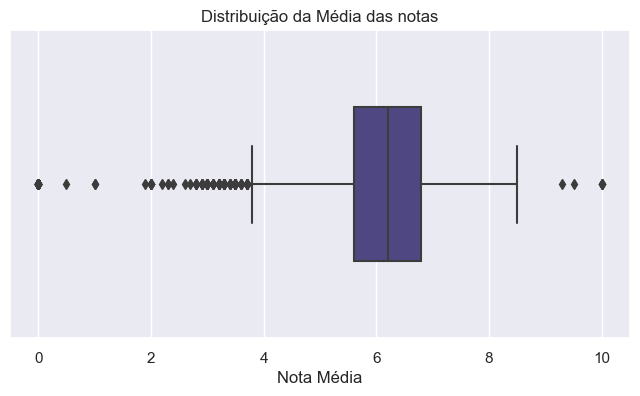

In [86]:
fig = plt.figure(figsize=(8,4))
ax = sns.boxplot(x= tmdb['vote_average'],width = 0.5, color='#483D8B')
ax.set(title='Distribuição da Média das notas', xlabel='Nota Média')

- É normal um filme receber nota zero, mas ter a média zero não.
- Da mesma forma, para que um filme tenha a média 10 é preciso que todas as pessoas tenham votado 10, o que é altamente improvável.
- As notas médias 0 e 10 vem provavelmente de filmes sem votos, ou com poucos votos.
- Devemos tratar esses dados para que eles não nos atrapalhem no futuro.

In [109]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [110]:
tmdb.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


- Confirmamos a suspeita de que os filmes com médias 0 e 10 tem poucas notas, e portanto não podem ser comparados com filmes com mais notas.
- Vamos remover de nossa base de dados todos os filmes que tenham menos de 10 votos.

## Tratando os dados

In [111]:
tmbd_mais_de_10_notas = tmdb.query('vote_count >= 10')

In [112]:
tmbd_mais_de_10_notas.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


- Já podemos perceber que agora a nota média mínima é 1.9, e a máxima é 8.5.

Text(0, 375, 'Mediana representada pela linha tracejada')

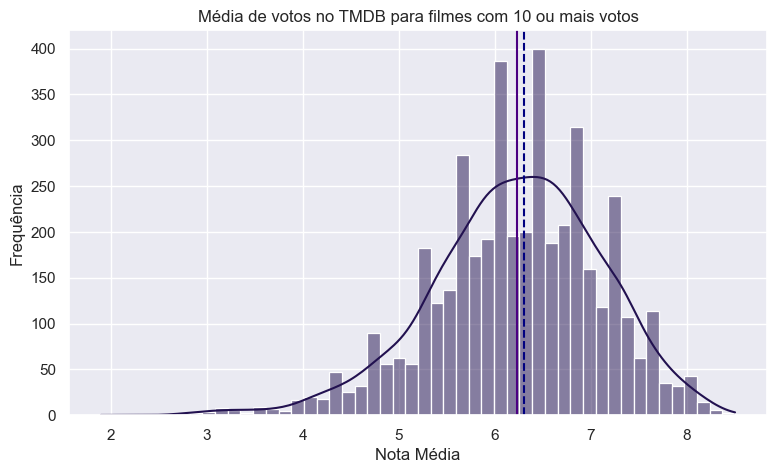

In [113]:
fig = plt.figure(figsize=(9,5))
ax = sns.histplot(tmbd_mais_de_10_notas['vote_average'], kde=True)

mu = tmbd_mais_de_10_notas['vote_average'].mean()
median = tmbd_mais_de_10_notas['vote_average'].median()

ax.set(xlabel= 'Nota Média', ylabel= 'Frequência')
ax.set_title("Média de votos no TMDB para filmes com 10 ou mais votos")
ax.axvline(mu, color='#4B0082')
ax.axvline(median, color='#000080', linestyle='--')
ax.annotate('Média representada pela linha sólida', xy = (0,400), fontsize=12)
ax.annotate('Mediana representada pela linha tracejada', xy = (0,375), fontsize=12)

[Text(0.5, 1.0, 'Distribuição da Média das notas para filmes com 10 ou mais votos'),
 Text(0.5, 0, 'Nota Média')]

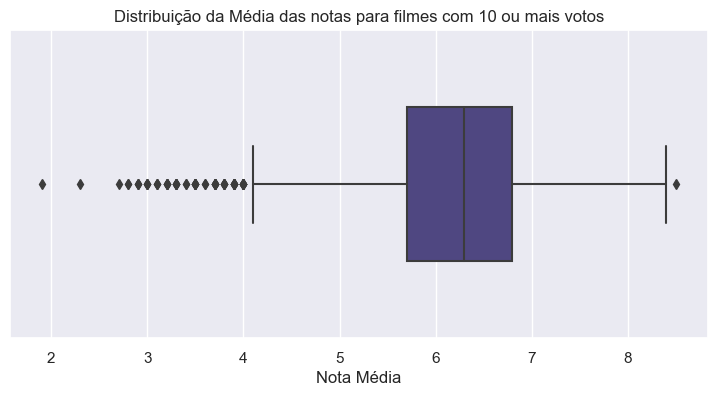

In [116]:
fig = plt.figure(figsize=(9,4))
ax = sns.boxplot(x= tmbd_mais_de_10_notas['vote_average'],width = 0.5, color='#483D8B')
ax.set(title='Distribuição da Média das notas para filmes com 10 ou mais votos', xlabel='Nota Média')

- Nossos dados lembram uma distribuição normal, com uma leve assimetria a esquerda

## Analisando dados do Movielens

In [118]:
ml = pd.read_csv('ratings.csv')
ml.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [123]:
ml_mean = ml.groupby('movieId').mean()['rating']
ml_mean

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

Text(0.5, 1.0, 'Distibuição das Médias das notas do Movie Lens')

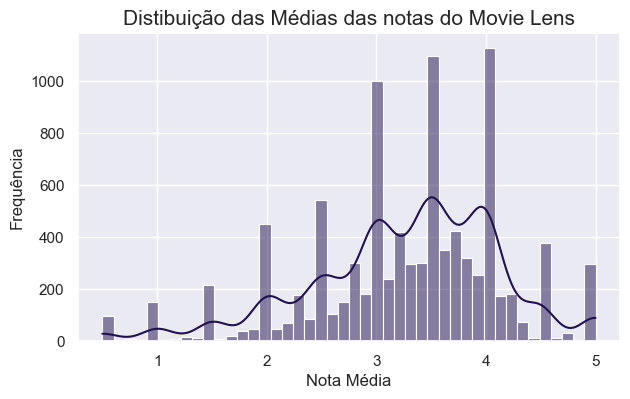

In [133]:
fig = plt.figure(figsize=(7,4))
ax = sns.histplot(ml_mean.values, kde=True)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Distibuição das Médias das notas do Movie Lens', fontsize=15)

Text(0.5, 0, 'Nota Média')

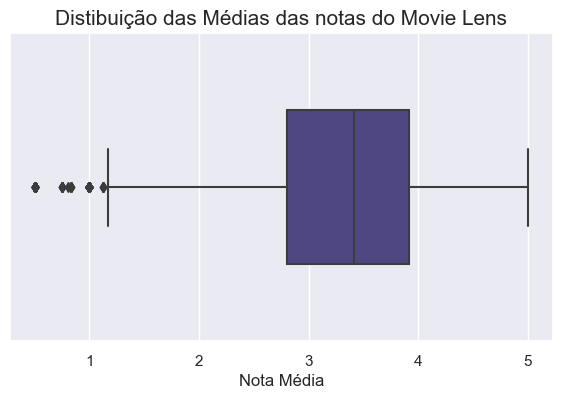

In [137]:
fig = plt.figure(figsize=(7,4))
ax = sns.boxplot(x = ml_mean.values, width = 0.5, color ='#483D8B')
ax.set_title('Distibuição das Médias das notas do Movie Lens', fontsize=15)
ax.set_xlabel('Nota Média')

- Percebemos o mesmo problema nessa base de dados, portanto, vamos realizar o mesmo tratamento nos dados, excluindo filmes que tenham menos de 10 votos

In [140]:
qtd_votos = ml.groupby('movieId').count()
qtd_votos.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [147]:
qtd_votos.query('rating >= 10').head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102


In [152]:
ml_10 = qtd_votos.query('rating >= 10').index
ml_10 = ml_10.values
ml_10

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [155]:
ml_10_mean = ml_mean.loc[ml_10]
ml_10_mean

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

Text(0.5, 1.0, 'Distibuição das Médias das notas do Movie Lens para filmes com 10 ou mais votos')

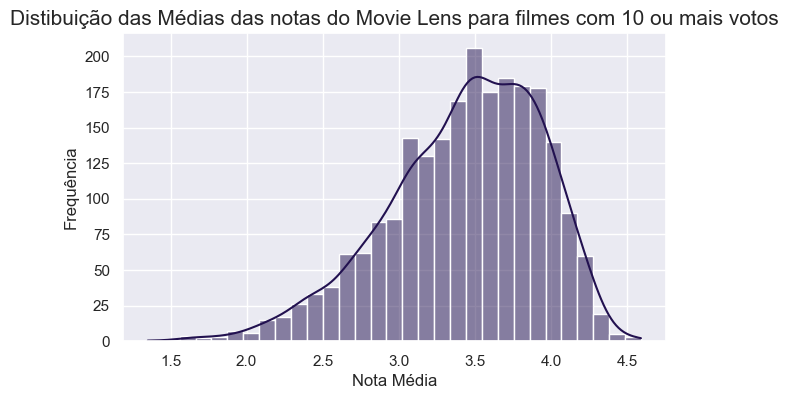

In [162]:
fig = plt.figure(figsize=(7,4))
ax = sns.histplot(ml_10_mean.values, kde=True)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Distibuição das Médias das notas do Movie Lens para filmes com 10 ou mais votos', fontsize=15)

Text(0.5, 0, 'Nota Média')

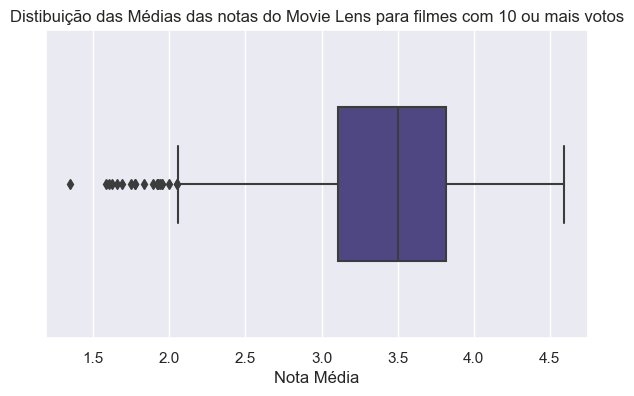

In [163]:
fig = plt.figure(figsize=(7,4))
ax = sns.boxplot(x = ml_10_mean.values, width = 0.5, color ='#483D8B')
ax.set_title('Distibuição das Médias das notas do Movie Lens para filmes com 10 ou mais votos', fontsize=12)
ax.set_xlabel('Nota Média')

- Uma análise visual para as duas bases de dados nos leva a concluir que as pessoas se comportam de maneira similiar, pois ambas as bases de dados apresentam uma distribuição aparentemente normal com uma leve assimetria para a esquerda

## Visualizando a CDF (Cumulative Distribution Function)

Também conhecida como FDA (Função de Distribuição Acumulada), é um conceito importante na análise de dados e estatística. Ela descreve a probabilidade acumulada de uma variável aleatória assumir um determinado valor ou um valor menor. Em outras palavras, a FDA nos dá uma visão completa da distribuição dos dados ao longo de um intervalo, mostrando como a probabilidade de ocorrência dos valores se acumula à medida que avançamos nessa escala. Essa função é útil para entender a propagação e a dispersão dos dados, além de permitir o cálculo de probabilidades associadas a intervalos específicos. Ao plotar a FDA, podemos visualizar a forma da distribuição dos dados e fazer inferências estatísticas sobre eles.

Vídeos para estudar:
- **RespondeAí:** https://www.youtube.com/watch?v=F9fXrpqCttI&ab_channel=RespondeA%C3%AD 
- **Engenheiro Cripto:** https://www.youtube.com/watch?v=QmMb1il7DNQ&ab_channel=EngenheiroCripto 

Abaixo, um vídeo ensinando sobre CDF e como plotar com o Seaborn atualizado:

In [171]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Twh0w3gcrDI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

Text(3.53, 0.47, '50%')

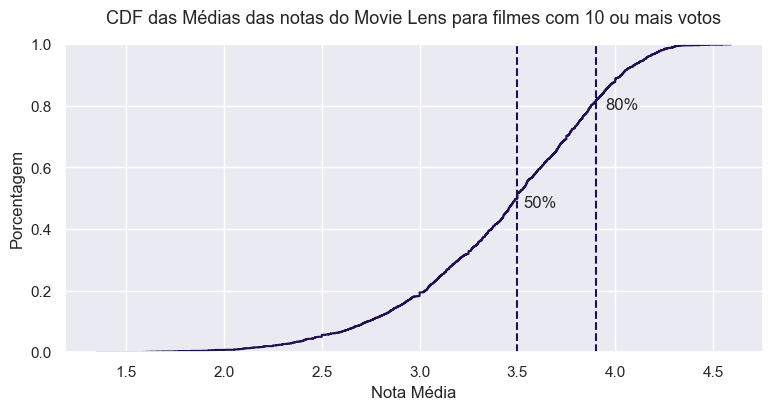

In [259]:
fig = plt.figure(figsize=(9,4))
ax = sns.ecdfplot(ml_10_mean.values)
ax.set(xlabel='Nota Média', ylabel='Porcentagem')
ax.set_title('CDF das Médias das notas do Movie Lens para filmes com 10 ou mais votos', fontsize=13, pad=15)
ax.axvline(3.9, linestyle='--')
ax.annotate('80%', xy=(3.95,0.79))
ax.axvline(3.5, linestyle='--')
ax.annotate('50%', xy=(3.53,0.47))

**Observando a Distribuição Acumulada, podemos perceber:**
- Filmes com nota média igual ou inferior a 3 estão entre os 20% com nota média mais baixa
- Filmes com nota média igual ou inferior a 3.9 estão entre os 20% com nota média mais alta
- Filmes com nota média maior ou igual a 4 estão entre os 10% com nota média mais alta

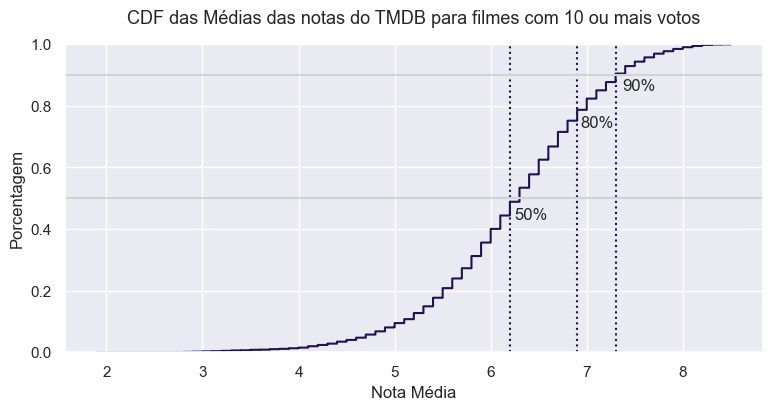

In [271]:
fig = plt.figure(figsize=(9,4))
ax = sns.ecdfplot(tmbd_mais_de_10_notas['vote_average'])
ax.set(xlabel='Nota Média', ylabel='Porcentagem')
ax.set_title('CDF das Médias das notas do TMDB para filmes com 10 ou mais votos', fontsize=13, pad=15)
ax.axvline(6.9,linestyle=':')
ax.annotate('90%',xy=(7.37,0.85))
ax.axvline(7.3,linestyle=':')
ax.annotate('80%',xy=(6.93,0.73))
ax.axvline(6.2,linestyle=':')
ax.annotate('50%',xy=(6.25,0.43))

ax.axhline(0.9, color='lightgrey')
ax.axhline(0.5, color='lightgrey')

**Observando a Distribuição Acumulada, podemos perceber:**
- Filmes com nota média igual ou inferior a 5.5 estão entre os 20% com nota média mais baixa
- Filmes com nota média igual ou inferior a 6.9 estão entre os 20% com nota média mais alta
- Filmes com nota média maior ou igual a 7.3 estão entre os 10% com nota média mais alta